# _Dataquest: Measures of Variability_

This notebook was adapted from Dataquest's lesson _Measures of Variability_ within their probability and statistics chapter. 

# _The Range_

- one intuitive way to measure variability of distribution: find difference between maximum and minimum value
    - this measure is called *the range*
    - range = max - min

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# read in data
houses = pd.read_csv('data/AmesHousing_1.txt', sep='\t')

In [6]:
import numpy as np
# function that takes array of numerical values and returns range of array
def return_range(array):
    '''
    Function that takes array of numerical values and returns range
    '''
    min_val = np.min(array)
    max_val = np.max(array)
    the_range = abs(min_val - max_val)
    return the_range

In [7]:
# using function above, measure range of SalePrice variable
return_range(houses['SalePrice'])

742211

In [8]:
# gather the range for each year and store in a dictionary
range_by_year = {}

for year in list(houses['Yr Sold'].unique()):
    range_by_year[year] = return_range(houses[houses['Yr Sold'] == year]['SalePrice'])

In [9]:
# did prices have the greatest variability in 2008?
one = False

# prices variability peaked in 2007, decreased until 2010?
two = True

## _The Average Distance_

- problem with range is it considers only two values in distribution
    - considers only the *extreme* values (min & max)

In [10]:
# function that takes in numerical array and returns average distance
def average_distance(array):
    '''
    takes in numerical array and returns average distance
    '''
    # compute the mean of the array
    array_mean = np.mean(array)
    # initialize an empty list
    lst = []
    # loop through values of the array
    for value in array:
        distance = value - array_mean
        lst.append(distance)

    # gather mean of the list
    lst_mean = np.mean(lst)
    return lst_mean

In [11]:
# distribution c
C = [1,1,1,1,1,1,1,1,1,21]

# compute the average distance for the above distribution
avg_distance = average_distance(C)

# print the result
print(avg_distance)

0.0


## _Mean Absolute Deviation_

- mean is the balance point of distribution
    - total distance of values above/below mean is the same
- *absolute value* (also called modulus) of number is the positive version
- distance of a value from the mean is called *deviation*

In [12]:
# function that takes numerical array and returns mean absolute deviation
def absolute_deviation(array):
    '''
    takes in numerical array and returns absolute deviation
    '''
    # compute the mean of the array
    array_mean = np.mean(array)
    # initialize an empty list
    lst = []
    # loop through values of the array
    for value in array:
        distance = abs(value - array_mean)
        lst.append(distance)

    # gather mean of the list
    lst_mean = np.mean(lst)
    return lst_mean

In [13]:
# distribution c
C = [1,1,1,1,1,1,1,1,1,21]

# compute the mean absolute deviation of distribution C
mad = absolute_deviation(C)

print(mad)

3.6


## _Variance_

- *variance* --> square each distance and then find the mean of all squared sitances
    - sometimes called mean squared distance or mean squared deviation

In [14]:
# function that takes numerical array and returns variance
def variance(array):
    '''
    Function that takes numerical array and returns variance
    '''
    # compute mean
    array_mean = np.mean(array)
    # initialize empty list
    lst = []
    # loop through values in array
    for value in array:
        squared_dist = (value - array_mean) ** 2
        lst.append(squared_dist)
    # gather mean of lst
    lst_mean = np.mean(lst)
    return lst_mean

In [15]:
# distribution C
C = [1,1,1,1,1,1,1,1,1,21]

# compute the variance of above distribution 
variance_c = variance(C)

print(variance_c)

36.0


## _Standard Deviation_

- squaring the distances has drawback of squaring the units of measurement
    - to solve this and reduce the variability value, we take the square root of the variance
- *standard deviation* --> square root of variance

In [16]:
from math import sqrt
# function that takes in a numerical array and returns standard deviation of the array
def standard_deviation(array):
    '''
    Function that takes numerical array and calculates the standard deviation
    '''
    # compute the mean of the array
    array_mean = np.mean(array)
    # create empty list
    lst = []
    # loop through the values of the array
    for value in array:
        squared_dist = (value - array_mean) ** 2
        lst.append(squared_dist)
    # gather mean of the list (i.e. the variance)
    lst_mean = np.mean(lst)
    # get square root of the variance
    std_dev = sqrt(lst_mean)
    return std_dev

In [17]:
# distribution C
C = [1,1,1,1,1,1,1,1,1,21]

# compute the standard deviation of distribution C
standard_deviation_C = standard_deviation(C)

print(standard_deviation_C)

6.0


## _Average Variability Around the Mean_

- in practice, standard deviation --> most used measure of variability
    - tells us how much the values in a distribution vary (on average) around mean of distribution
- below is a visualization of the variability around the mean of the `SalePrice` column

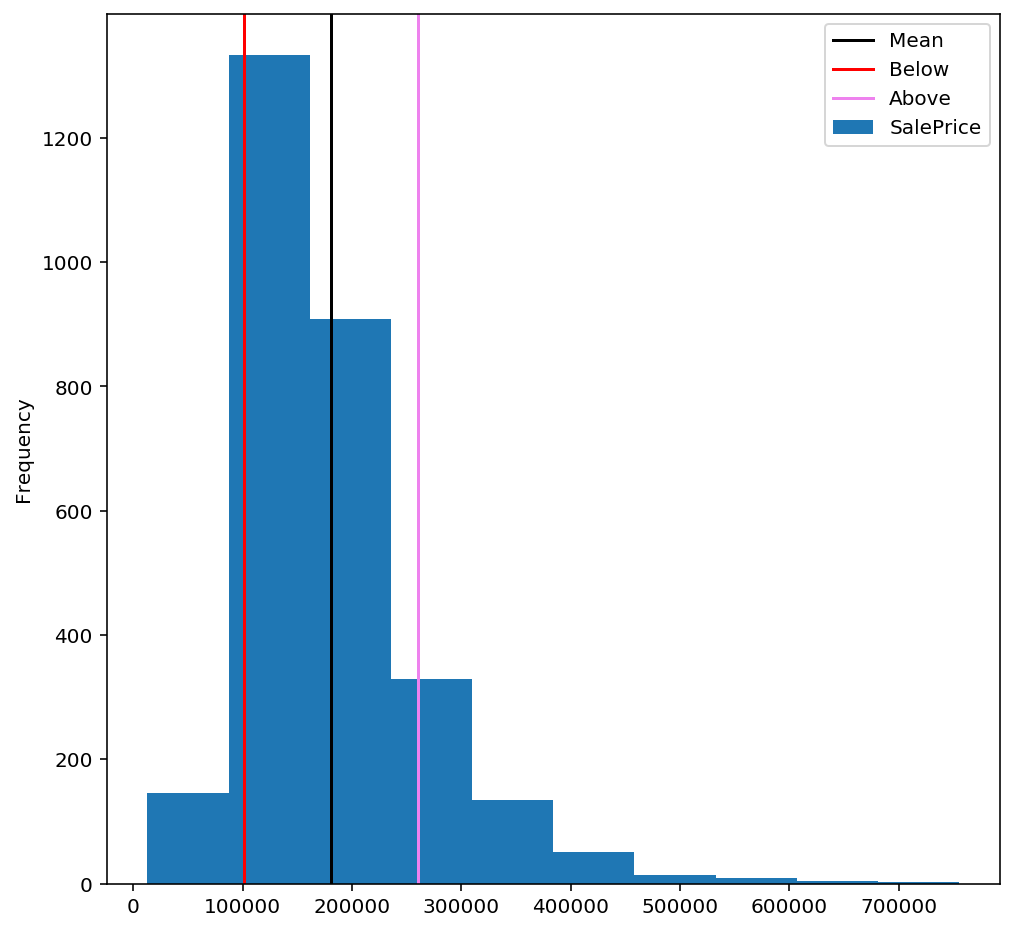

In [23]:
# generate a histogram of SalePrice variable
mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
houses['SalePrice'].plot.hist(figsize=(8,8))
plt.axvline(mean, color = 'black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'red', label = 'Below')
plt.axvline(mean + st_dev, color = 'violet', label = 'Above')
plt.legend();

In [84]:
# gather the standard deviation for each year and store in a dictionary
std_by_year = {}

for year in list(houses['Yr Sold'].unique()):
    std_by_year[year] = standard_deviation(houses[houses['Yr Sold'] == year]['SalePrice'])
    
# print out the standard deviation for each year
std_by_year

{2010: 74631.4313083648,
 2009: 80856.80430109256,
 2008: 75592.73653419659,
 2007: 82542.77462863794,
 2006: 82619.69785337095}

In [80]:
# which year had the greatest variability of prices?
greatest_variability = 2006

# which year had the lowest variability of prices?
lowest_variability = 2010

## _A Measure of Spread_

- values in a distribution can be more or less spread
- below is four random samples of 50 sample points from `SalePrice`

In [75]:
for i in range(1,5):
    sample = houses['SalePrice'].sample(50, random_state = i)
    # we used the same random states for the samples in the graph above
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))
    
# take two samples from houses
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

Sample 1: 82615.40783167434
Sample 2: 101389.64727355911
Sample 3: 61292.05469999304
Sample 4: 65090.5935879575


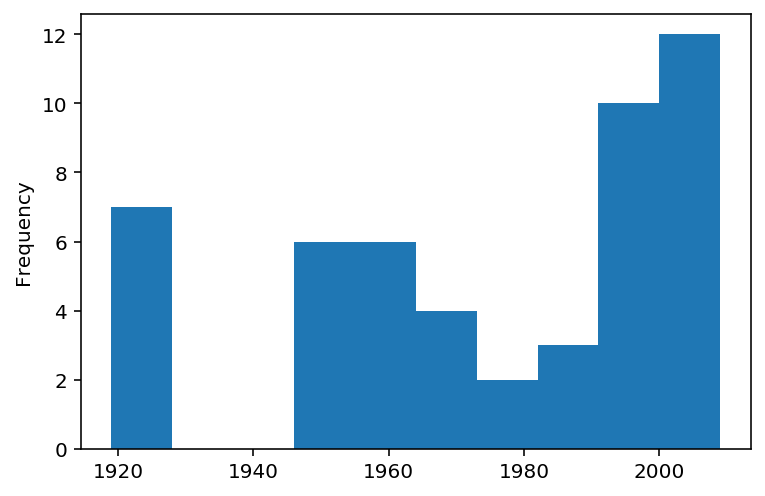

In [76]:
# plot sample 1
sample1.plot.hist();

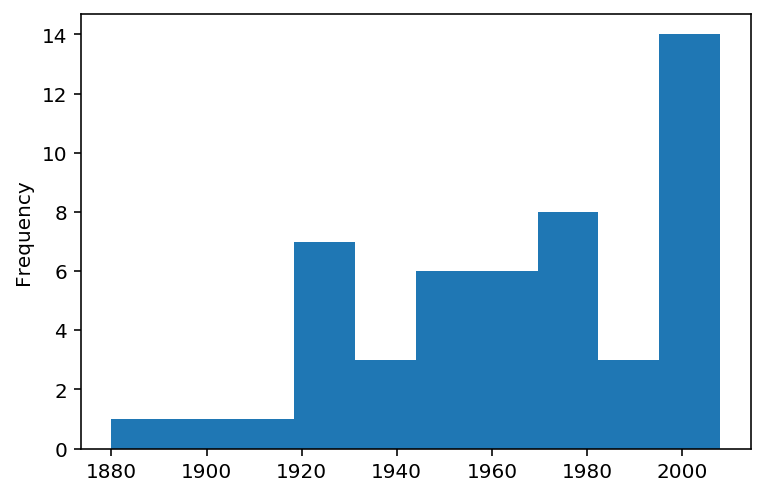

In [77]:
# plot sample 2
sample2.plot.hist();

In [41]:
# which sample has a bigger spread?
bigger_spread = 'sample 2'

# assign standard deviation of sample 1 to variable
st_dev1 = standard_deviation(sample1)

# calculate standard deviation of sample 2 to a variable
st_dev2 = standard_deviation(sample2)

## _The Sample Standard Deviation_

- in practice, we generally work with samples
    - want to use samples to make inferences about their corresponding populations
- can use the sample mean as an estimate of the population mean
- lowercase n describes the number of data points in a sample
- to check the reliability, we repeatedly sample a known population and see how the *sample* standard deviatiations compare on average to the *population* standard deviation

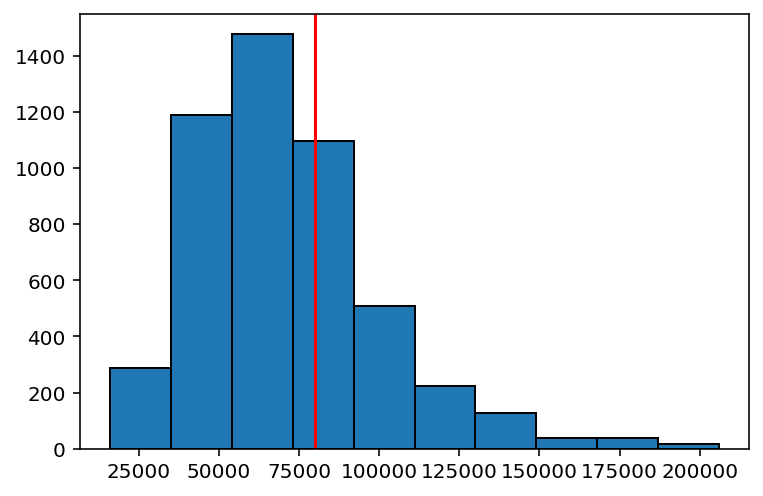

In [48]:
# sample SalePrice (i.e. population) 5000 times with 10 sample data points
sample_std_list = []

for n in range(5000):
    sample = houses['SalePrice'].sample(n=10, random_state=n)
    sample_std_list.append(standard_deviation(sample))
    
# generate a histogram to visualize the above distribution
plt.hist(sample_std_list, edgecolor='black')
plt.axvline(np.std(houses['SalePrice']), color='red');

## _Bessel's Correction_

- the above example suggests that the sample standard deviation tends to *underestimate* the population standard deviation
    - on average, we'll encounter situations where sample standard deviation < population standard deviation
- when we sample, more likely to get a spread that is lower than the population's
    - generally translates to lower standard deviation
- to correct underestimation, we can slightly modify sample standard deviation formula to return higher values
    - one way --> decrease the value of the denominator (*n - 1*)
    - the above is called **Bessel's correction**

In [53]:
# implement Bessel's correction in original standard deviation function
def standard_deviation(array):
    '''
    Function that takes numerical array and calculates the standard deviation
    '''
    # compute the mean of the array
    array_mean = np.mean(array)
    # create empty list
    lst = []
    # loop through the values of the array
    for value in array:
        squared_dist = (value - array_mean) ** 2
        lst.append(squared_dist)
    # gather mean of the list (i.e. the variance)
    lst_mean = np.sum(lst) / (len(lst) - 1)
    # get square root of the variance
    std_dev = sqrt(lst_mean)
    return std_dev

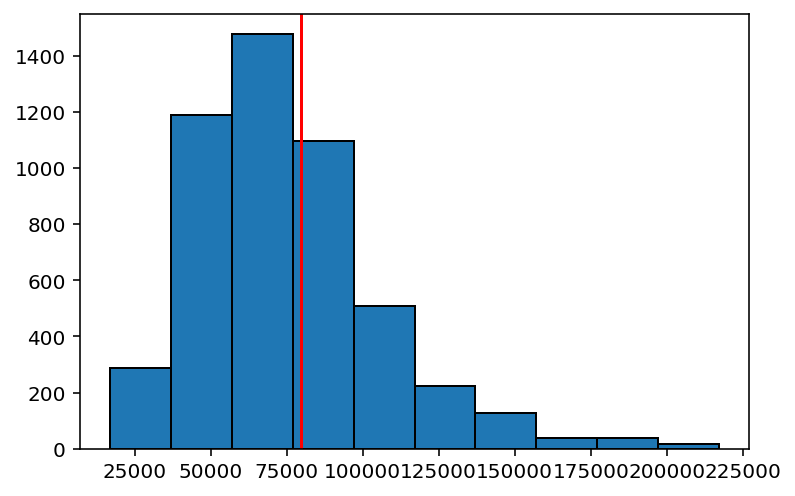

In [54]:
# rerun sample SalePrice (i.e. population) 5000 times with 10 sample data points
sample_std_list = []

for n in range(5000):
    sample = houses['SalePrice'].sample(n=10, random_state=n)
    sample_std_list.append(standard_deviation(sample))
    
# generate a histogram to visualize the above distribution
plt.hist(sample_std_list, edgecolor='black')
plt.axvline(np.std(houses['SalePrice']), color='red');

## _Standard Notation_

- statisticians agree that *n - 1* is best choice for sample standard deviation formula
- population standard deviaiton is denoted with the Greek letter σ ('sigma')
    - population variance is written as σ squared
- sample standard deviation is simply denoted with _s_ (and variance is _s squared_)

In [65]:
# sample generated by Dataquest
sample = houses.sample(100, random_state = 1)

from numpy import std, var

# use the std() method to compute the sample standard deviation
pandas_stdev = sample['SalePrice'].std(ddof=1)

# use numpy.std() function to compute sample standard deviation
numpy_stdev = std(sample['SalePrice'], ddof=1)

# compare the standard deviations from pandas and numpy
equal_stdevs = pandas_stdev == numpy_stdev

# use Series.var() method to compute sample variance
pandas_var = sample['SalePrice'].var(ddof=1)

# use numpy to compute sample variance
numpy_var = var(sample['SalePrice'], ddof=1)

# compare pandas and numpy calculations of the variance
equal_vars = pandas_var == numpy_var

## _Sample Variance -- Unbiased Estimator_

- sample variance is unbiased estimator for population variance
    - statistic is unbiased estimator when that statistic is equal on average to the parameter it estimates
    - caveat --> sample variance is unbiased only when we sample with replacement
- unbiasedness doesn't carry over to standard deviation

In [78]:
# population
population = [0, 3, 6]

# all possible combinations of the above population
samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]]

sample_variance = []
sample_std = []

# compute sample variance/std for each sample
for sample in samples:
    sample_variance.append(np.var(sample, ddof=1))
    sample_std.append(np.std(sample, ddof=1))

# take the mean of all the sample variances
mean_sample_variance = np.mean(sample_variance)

# compare the mean variance with population variance
equal_var = mean_sample_variance == (np.var(population))
    
# take the mean of all the sample std's
mean_sample_std = np.mean(sample_std)

# compare the mean std with population std
equal_stdev = mean_sample_std == (np.std(population))

**_The End :)_**